<a href="https://colab.research.google.com/github/prithvihehe/BandungEarthquake/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point

In [ ]:
df= pd.read_csv('/content/output-60-avg_damages-rlz-000_50.csv')

In [ ]:
df.head()

,asset_id,taxonomy,lon,lat,structural-no_damage,structural-slight,structural-moderate,structural-extreme,structural-complete,Unnamed: 9,Unnamed: 10
0,JBsmall_5488,W_LFM-DUM_H:1,107.169,-6.549,41.900,0.095600,0.004780,0.000335,4.320000e-05,NaN,W_LFM-DUM_H:1
1,JBsmall_5489,MUR_LWAL_CL99-DNO_H:1,107.169,-6.549,1.770,0.198000,0.022300,0.005120,3.140000e-03,NaN,MUR_LWAL_CL99-DNO_H:1
2,JBsmall_5490,W_LFM-DUM_H:1,107.169,-6.549,14.000,0.031900,0.001590,0.000112,1.440000e-05,NaN,MCF_LWAL-DUL_H:1
3,JBsmall_5491,MCF_LWAL-DUL_H:1,107.169,-6.549,0.999,0.000614,0.000014,0.000001,3.260000e-07,NaN,S_LFM-DUL_H:1
4,JBsmall_5492,MUR_LWAL_CL99-DNO_H:1,107.169,-6.549,6.200,0.694000,0.078100,0.017900,1.100000e-02,NaN,MCF_LWAL-DUM_H:1


In [ ]:
print(df.columns)

Index(['asset_id', 'taxonomy', 'lon', 'lat', 'structural-no_damage',
       'structural-slight', 'structural-moderate', 'structural-extreme',
       'structural-complete', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')


In [ ]:
df['taxonomy_group'] = df['taxonomy'].str.extract(r'^([^_]+)')

**Taxonomy**  
MCR: Unreinforced Masonry  
MCF: Reinforced Masonry  
CR: Reinforced Concrete  
W: Wood  
S: Steel

In [ ]:
df.head()

,asset_id,taxonomy,lon,lat,structural-no_damage,structural-slight,structural-moderate,structural-extreme,structural-complete,Unnamed: 9,Unnamed: 10,taxonomy_group
0,JBsmall_5488,W_LFM-DUM_H:1,107.169,-6.549,41.900,0.095600,0.004780,0.000335,4.320000e-05,NaN,W_LFM-DUM_H:1,W
1,JBsmall_5489,MUR_LWAL_CL99-DNO_H:1,107.169,-6.549,1.770,0.198000,0.022300,0.005120,3.140000e-03,NaN,MUR_LWAL_CL99-DNO_H:1,MUR
2,JBsmall_5490,W_LFM-DUM_H:1,107.169,-6.549,14.000,0.031900,0.001590,0.000112,1.440000e-05,NaN,MCF_LWAL-DUL_H:1,W
3,JBsmall_5491,MCF_LWAL-DUL_H:1,107.169,-6.549,0.999,0.000614,0.000014,0.000001,3.260000e-07,NaN,S_LFM-DUL_H:1,MCF
4,JBsmall_5492,MUR_LWAL_CL99-DNO_H:1,107.169,-6.549,6.200,0.694000,0.078100,0.017900,1.100000e-02,NaN,MCF_LWAL-DUM_H:1,MUR


In [ ]:
damage_cols = [
    'structural-no_damage', 'structural-slight',
    'structural-moderate', 'structural-extreme',
    'structural-complete'
]

In [ ]:
df['total_buildings'] = df[damage_cols].sum(axis=1)
for col in damage_cols:
    df[col + '_prob'] = df[col] / df['total_buildings']
df.head()

,asset_id,taxonomy,lon,lat,structural-no_damage,structural-slight,structural-moderate,structural-extreme,structural-complete,Unnamed: 9,Unnamed: 10,taxonomy_group,total_buildings,structural-no_damage_prob,structural-slight_prob,structural-moderate_prob,structural-extreme_prob,structural-complete_prob
0,JBsmall_5488,W_LFM-DUM_H:1,107.169,-6.549,41.900,0.095600,0.004780,0.000335,4.320000e-05,NaN,W_LFM-DUM_H:1,W,42.000758,0.997601,0.002276,0.000114,0.000008,1.028553e-06
1,JBsmall_5489,MUR_LWAL_CL99-DNO_H:1,107.169,-6.549,1.770,0.198000,0.022300,0.005120,3.140000e-03,NaN,MUR_LWAL_CL99-DNO_H:1,MUR,1.998560,0.885638,0.099071,0.011158,0.002562,1.571131e-03
2,JBsmall_5490,W_LFM-DUM_H:1,107.169,-6.549,14.000,0.031900,0.001590,0.000112,1.440000e-05,NaN,MCF_LWAL-DUL_H:1,W,14.033616,0.997605,0.002273,0.000113,0.000008,1.026108e-06
3,JBsmall_5491,MCF_LWAL-DUL_H:1,107.169,-6.549,0.999,0.000614,0.000014,0.000001,3.260000e-07,NaN,S_LFM-DUL_H:1,MCF,0.999629,0.999370,0.000614,0.000014,0.000001,3.261209e-07
4,JBsmall_5492,MUR_LWAL_CL99-DNO_H:1,107.169,-6.549,6.200,0.694000,0.078100,0.017900,1.100000e-02,NaN,MCF_LWAL-DUM_H:1,MUR,7.001000,0.885588,0.099129,0.011156,0.002557,1.571204e-03


In [ ]:
df.describe()

,lon,lat,structural-no_damage,structural-slight,structural-moderate,structural-extreme,structural-complete,Unnamed: 9,total_buildings,structural-no_damage_prob,structural-slight_prob,structural-moderate_prob,structural-extreme_prob,structural-complete_prob
count,16797.000000,16797.000000,16797.000000,16797.000000,16797.000000,16797.000000,16797.000000,0.0,16797.000000,16792.000000,16792.000000,1.679200e+04,16792.000000,16792.000000
mean,107.734582,-6.951346,12.337313,2.099136,0.445906,0.146898,0.161437,NaN,15.190691,0.830032,0.123384,2.607533e-02,0.008927,0.011582
std,0.271287,0.206437,22.213999,9.315101,2.138809,0.732317,0.846017,NaN,29.096156,0.220790,0.149324,4.048922e-02,0.016871,0.035776
min,107.169000,-7.367000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.045267,0.000002,3.882611e-09,0.000000,0.000000
25%,107.552000,-7.092000,0.988000,0.018700,0.000873,0.000088,0.000021,NaN,1.000285,0.741616,0.006281,2.568009e-04,0.000024,0.000005
50%,107.710000,-6.940000,2.810000,0.191000,0.018400,0.003340,0.001470,NaN,3.994000,0.938285,0.054489,5.001200e-03,0.000914,0.000400
75%,107.934000,-6.822000,15.000000,1.040000,0.158000,0.038600,0.027700,NaN,17.965788,0.993180,0.201666,3.474303e-02,0.009641,0.007094
max,108.237000,-6.520000,543.000000,205.000000,49.200000,18.800000,20.200000,NaN,762.974000,0.999998,0.537107,2.262057e-01,0.114750,0.507690


In [ ]:
grouped = df.groupby('taxonomy_group')[damage_cols].sum()
grouped

,structural-no_damage,structural-slight,structural-moderate,structural-extreme,structural-complete
taxonomy_group,,,,,
CR,25553.12162,18874.619078,3916.563658,1192.170140,987.920468
MCF,49300.94890,6082.116485,1158.386211,399.363481,517.691017
MUR,17530.97860,4121.790200,1044.092630,434.678298,825.065924
S,34637.85990,2825.262905,343.661884,68.952694,31.295624
W,80206.94000,3355.406520,1027.183845,372.287792,349.678051


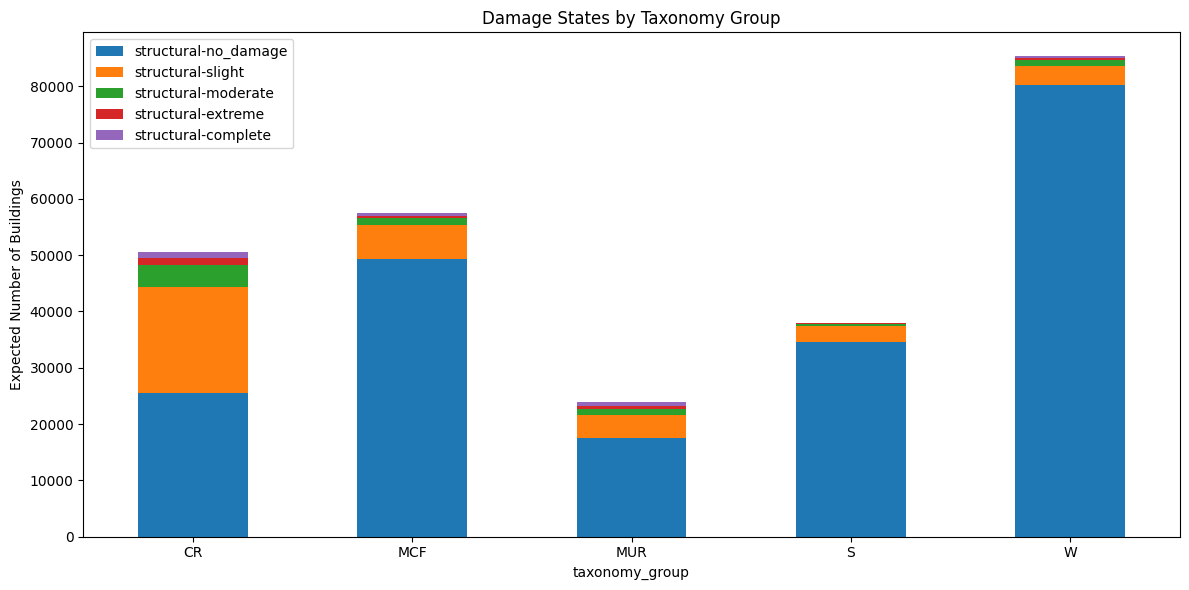

In [ ]:
grouped.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Damage States by Taxonomy Group')
plt.ylabel('Expected Number of Buildings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
damage_cols = ['structural-no_damage', 'structural-slight', 'structural-moderate', 'structural-extreme', 'structural-complete']

In [ ]:
grouped['total'] = grouped[damage_cols].sum(axis=1)

In [ ]:
grouped_percent = grouped[damage_cols].div(grouped['total'], axis=0) * 100

In [ ]:
weights = [0, 1, 2, 3, 4]
grouped['severity_index'] = (grouped[damage_cols].multiply(weights).sum(axis=1)) / grouped['total']

In [ ]:
print("Total exposure per taxonomy group:")
print(grouped['total'], "\n")

Total exposure per taxonomy group:
taxonomy_group
CR     50524.394964
MCF    57458.506093
MUR    23956.605652
S      37907.033007
W      85311.496208
Name: total, dtype: float64 



<ipython-input-78-2e802dbb9803>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped.index, y=grouped['total'], palette='viridis')


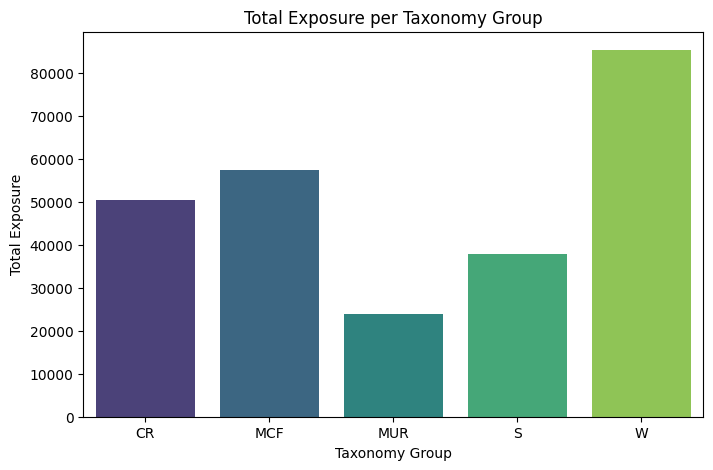

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=grouped.index, y=grouped['total'], palette='viridis')
plt.title('Total Exposure per Taxonomy Group')
plt.ylabel('Total Exposure')
plt.xlabel('Taxonomy Group')
plt.show()

In [ ]:
print("Damage proportions (%):")
print(grouped_percent.round(2), "\n")

Damage proportions (%):
                structural-no_damage  structural-slight  structural-moderate  \
taxonomy_group                                                                 
CR                             50.58              37.36                 7.75   
MCF                            85.80              10.59                 2.02   
MUR                            73.18              17.21                 4.36   
S                              91.38               7.45                 0.91   
W                              94.02               3.93                 1.20   

                structural-extreme  structural-complete  
taxonomy_group                                           
CR                            2.36                 1.96  
MCF                           0.70                 0.90  
MUR                           1.81                 3.44  
S                             0.18                 0.08  
W                             0.44                 0.41   



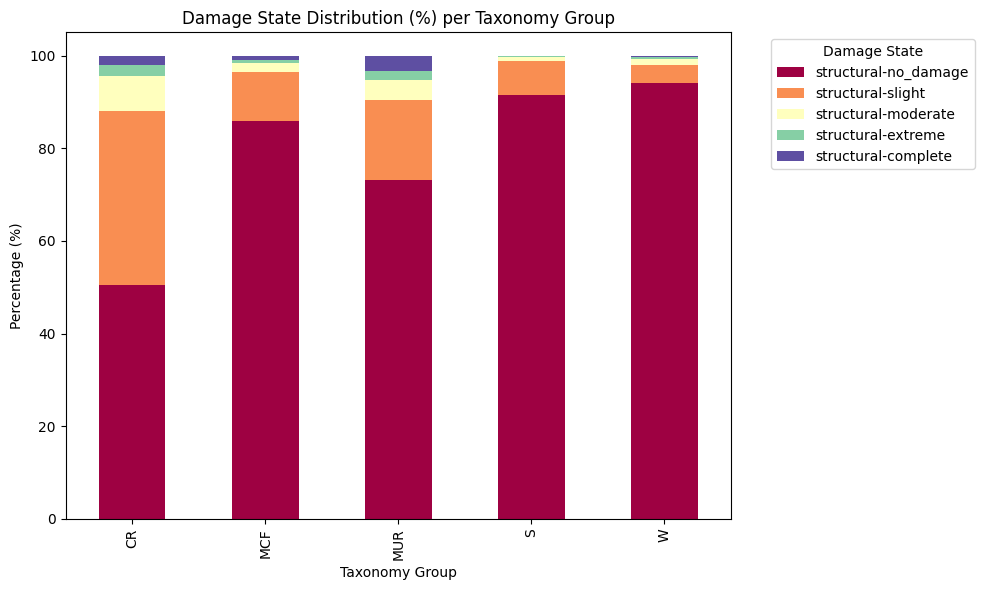

In [ ]:
grouped_percent.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Spectral')
plt.title('Damage State Distribution (%) per Taxonomy Group')
plt.ylabel('Percentage (%)')
plt.xlabel('Taxonomy Group')
plt.legend(title='Damage State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
print("Weighted damage severity index:")
print(grouped['severity_index'].round(3), "\n")

Weighted damage severity index:
taxonomy_group
CR     0.678
MCF    0.203
MUR    0.451
S      0.101
W      0.093
Name: severity_index, dtype: float64 



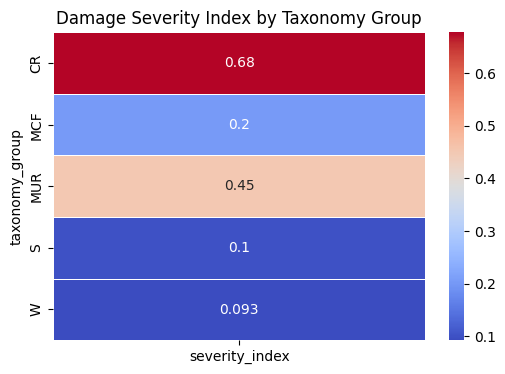

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(grouped[['severity_index']], annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Damage Severity Index by Taxonomy Group')
plt.show()

In [ ]:
df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

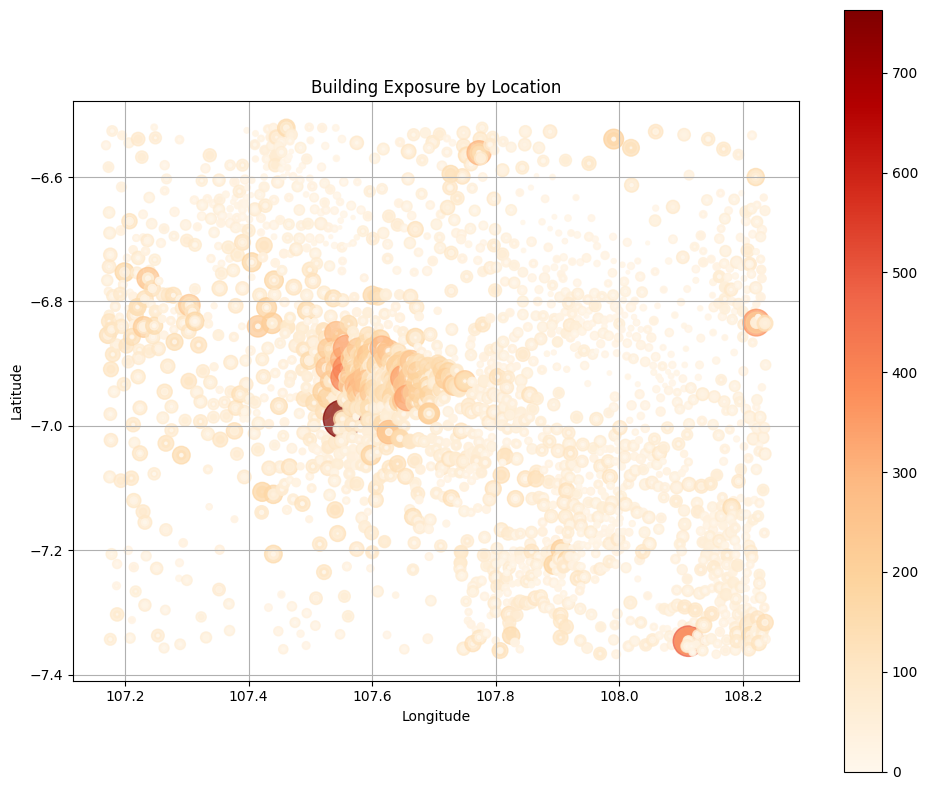

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(
    ax=ax,
    column='total_buildings',
    markersize=gdf['total_buildings'],  # size proportional to number of buildings
    cmap='OrRd',
    legend=True,
    alpha=0.7
)

plt.title('Building Exposure by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
damage_cols = [
    'structural-no_damage',
    'structural-slight',
    'structural-moderate',
    'structural-extreme',
    'structural-complete'
]

damage_prob_cols = [col + '_prob' for col in damage_cols]

In [ ]:
df = df.dropna(subset=['lon', 'lat'])  # drop any rows missing coordinates
df['geometry'] = df.apply(lambda row: Point(row['lon'], row['lat']), axis=1)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs='EPSG:4326')

In [ ]:
gdf['max_damage_state'] = gdf[damage_prob_cols].idxmax(axis=1)
gdf['max_damage_state'] = gdf['max_damage_state'].str.replace('_prob', '')

<ipython-input-87-f652d69fca90>:1: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  gdf['max_damage_state'] = gdf[damage_prob_cols].idxmax(axis=1)


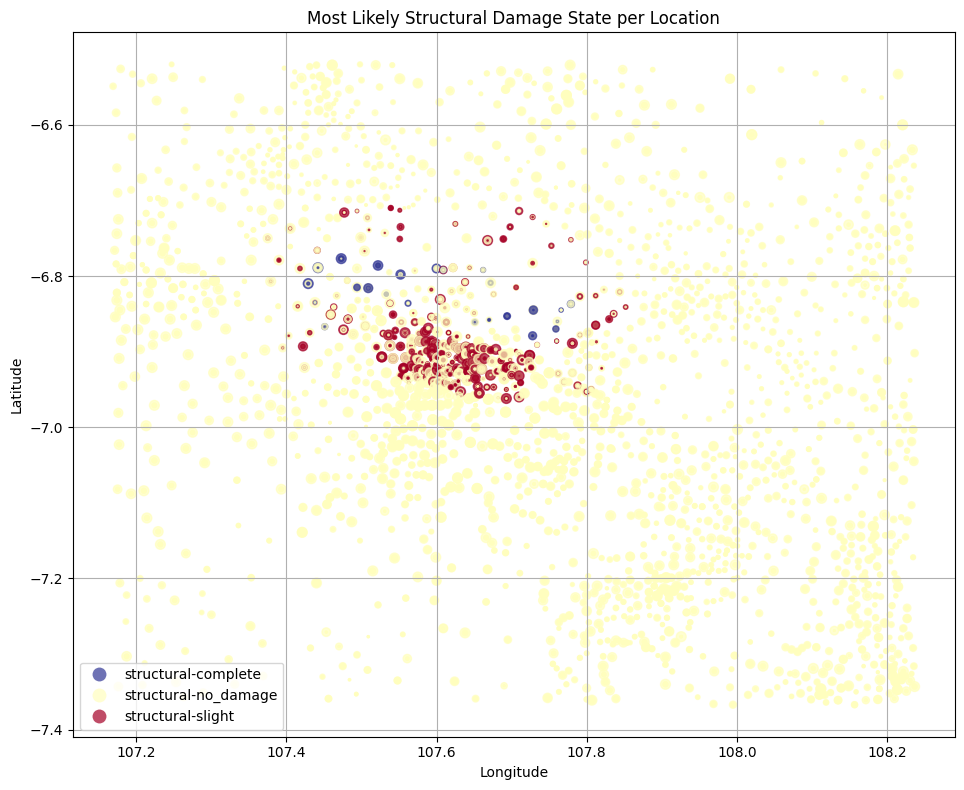

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(
    ax=ax,
    column='max_damage_state',
    categorical=True,
    legend=True,
    cmap='RdYlBu_r',
    markersize=gdf['total_buildings'].clip(upper=100) * 0.5,  # scale size, cap at 100
    alpha=0.7
)

plt.title('Most Likely Structural Damage State per Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()